In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = 'gdrive/My Drive/housepricedata.csv'

In [0]:
!ls

drive  gdrive  sample_data


In [0]:
!cd gdrive

In [0]:
!cd gdrive/My\ Drive

In [0]:
data = pd.read_csv('gdrive/My Drive/housepricedata.csv')

In [0]:
data

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [0]:
dataset = data.values

In [0]:
X = dataset[:, 0:10]
Y = dataset[:, 10]

In [0]:
Y

array([1, 1, 1, ..., 1, 0, 0])

In [0]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size = 0.3)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

In [0]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [0]:
from tensorflow.keras.models import Sequential 
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import losses
import numpy as np
from tensorflow.keras.layers import Input, Dense


In [0]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (10,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

hist = model.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data=(X_val, Y_val))

model.evaluate(X_test, Y_test)[1]

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 462us/sample - loss: 0.2737 - accuracy: 0.8914 - val_loss: 0.2832 - val_accuracy: 0.8950
Epoch 2/100
1022/1022 [==============================] - 0s 66us/sample - loss: 0.2728 - accuracy: 0.8885 - val_loss: 0.2811 - val_accuracy: 0.8950
Epoch 3/100
1022/1022 [==============================] - 0s 68us/sample - loss: 0.2729 - accuracy: 0.8875 - val_loss: 0.2806 - val_accuracy: 0.8950
Epoch 4/100
1022/1022 [==============================] - 0s 63us/sample - loss: 0.2722 - accuracy: 0.8894 - val_loss: 0.2803 - val_accuracy: 0.8904
Epoch 5/100
1022/1022 [==============================] - 0s 79us/sample - loss: 0.2711 - accuracy: 0.8904 - val_loss: 0.2796 - val_accuracy: 0.8950
Epoch 6/100
1022/1022 [==============================] - 0s 66us/sample - loss: 0.2706 - accuracy: 0.8914 - val_loss: 0.2799 - val_accuracy: 0.8995
Epoch 7/100
1022/1022 [==============================] - 0s 66us

0.8721461

In [0]:
import matplotlib.pyplot as plt

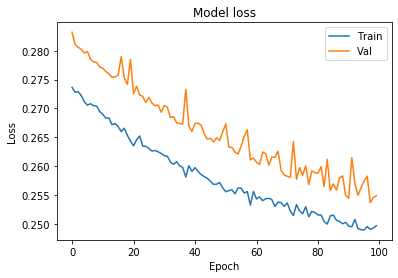

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

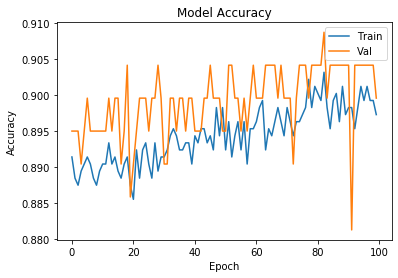

In [0]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [0]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/sample - loss: 0.4561 - accuracy: 0.7965 - val_loss: 0.3920 - val_accuracy: 0.8174
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/sample - loss: 0.3395 - accuracy: 0.8571 - val_loss: 0.3163 - val_accuracy: 0.8630
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/sample - loss: 0.3215 - accuracy: 0.8669 - val_loss: 0.2886 - val_accuracy: 0.8767
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/sample - loss: 0.2948 - accuracy: 0.8708 - val_loss: 0.2711 - val_accuracy: 0.8950
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/sample - loss: 0.2747 - accuracy: 0.8767 - val_loss: 0.2268 - val_accuracy: 0.9041
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/sample - loss: 0.2992 - accuracy: 0.8689 - val_loss: 0.3654 - val_accuracy: 0.8630
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/sample 

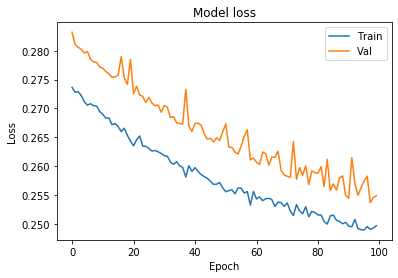

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

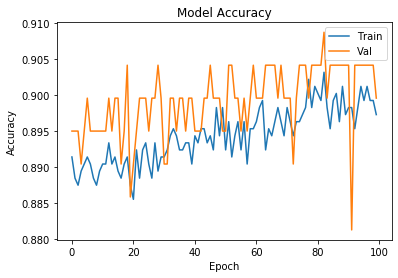

In [0]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [0]:
from tensorflow.keras import regularizers

In [0]:
# model_3 = Sequential([
# Dense(1000, activation = 'relu', kernel_regularizer=regularizers.l2(0.01), input_shape = (10,)),
# Dropout(0.3),
# Dense(1000, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
# Dropout(0.3),
# Dense(1000, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
# Dropout(0.3)
# Dense(1000, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
# Dropout(0.3)
# Dense(1, activation = 'sigmoid', kernel_regularizer=regularizers.l2(0.01)),
# ])

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

hist_3 = model_3.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_val, Y_val))


Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/sample - loss: 14.2451 - accuracy: 0.6047 - val_loss: 3.9530 - val_accuracy: 0.7991
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/sample - loss: 1.6736 - accuracy: 0.8297 - val_loss: 0.6363 - val_accuracy: 0.8904
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/sample - loss: 0.5567 - accuracy: 0.8679 - val_loss: 0.4898 - val_accuracy: 0.8950
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/sample - loss: 0.4965 - accuracy: 0.8640 - val_loss: 0.4726 - val_accuracy: 0.8995
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/sample - loss: 0.4771 - accuracy: 0.8796 - val_loss: 0.4574 - val_accuracy: 0.8950
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/sample - loss: 0.4633 - accuracy: 0.8845 - val_loss: 0.4534 - val_accuracy: 0.8950
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/sample

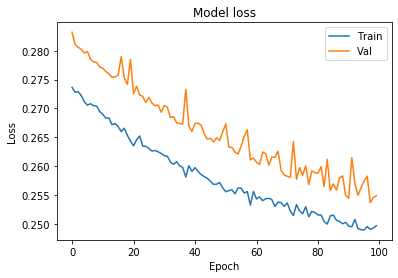

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

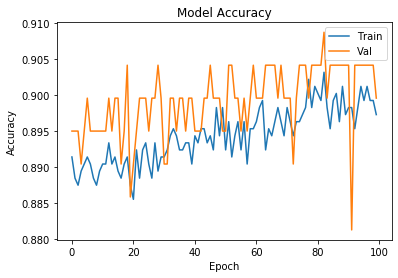

In [0]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()